<a href="https://colab.research.google.com/github/VikasAmlaha/Page_View_Time_Series_Visualizer/blob/main/Page_View_Time_Series_Visualizer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Page View Time Series Visualizer by Vikas

In this project we will visualize time series data using a line chart, bar chart, and box plots. We will use Pandas, Matplotlib, and Seaborn to visualize a dataset containing the number of page views each day on the freeCodeCamp.org forum from 2016-05-09 to 2019-12-03. The data visualizations will help us understand the patterns in visits and identify yearly and monthly growth.


* We will use Pandas to import the data from "fcc-forum-pageviews.csv". Set the index to the date column.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# To import csv file as df
df = pd.read_csv("fcc-forum-pageviews.csv" , index_col="date")
# To convert the index from string object to datetime format
df.index = pd.to_datetime(df.index, errors = "coerce")
print(df.shape)
print(df.head())






(1304, 1)
            value
date             
2016-05-09   1201
2016-05-10   2329
2016-05-11   1716
2016-05-12  10539
2016-05-13   6933


* Here we clean the data by filtering out days when the page views were in the top 2.5% of the dataset or bottom 2.5% of the dataset.

In [2]:
df = df[
    (df["value"] >= df["value"].quantile(0.025))
    & (df["value"] <= df["value"].quantile(0.975))
]
print(df.shape)
print(df.head())

(1238, 1)
            value
date             
2016-05-19  19736
2016-05-26  18060
2016-05-27  19997
2016-05-28  19044
2016-05-29  20325


* Create a draw_line_plot function that uses Matplotlib to draw a line chart similar to "examples/Figure_1.png". The title should be Daily freeCodeCamp Forum Page Views 5/2016-12/2019. The label on the x axis should be Date and the label on the y axis should be Page Views.


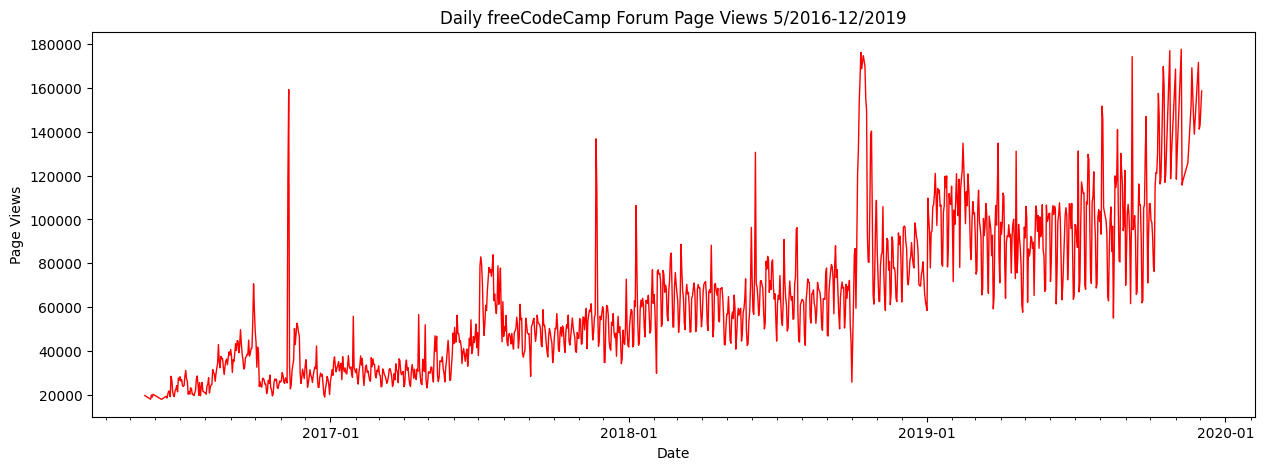

In [3]:

import matplotlib.dates as mdates
# Function to draw line chart
def draw_line_plot():
  # to set figure size for output
  plt.figure(figsize=(15, 5))
  # to plot line chart
  plt.plot(df.index, df["value"], color='red', linewidth=1)
  # to add labels and titles
  plt.xlabel("Date")
  plt.ylabel("Page Views")
  plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

  # Set major ticks to show months/years properly
  plt.gca().xaxis.set_major_locator(mdates.YearLocator())  # Show years as main ticks
  plt.gca().xaxis.set_minor_locator(mdates.MonthLocator())  # Show months as minor ticks
  plt.gca().xaxis.set_major_formatter(mdates.DateFormatter("%Y-%m"))  # Format as YYYY-MM
  # To show the plot
  plt.show()

# To call function to draw the line chart
draw_line_plot()




* Create a draw_bar_plot function that draws a bar chart similar to "examples/Figure_2.png". It should show average daily page views for each month grouped by year. The legend should show month labels and have a title of Months. On the chart, the label on the x axis should be Years and the label on the y axis should be Average Page Views.

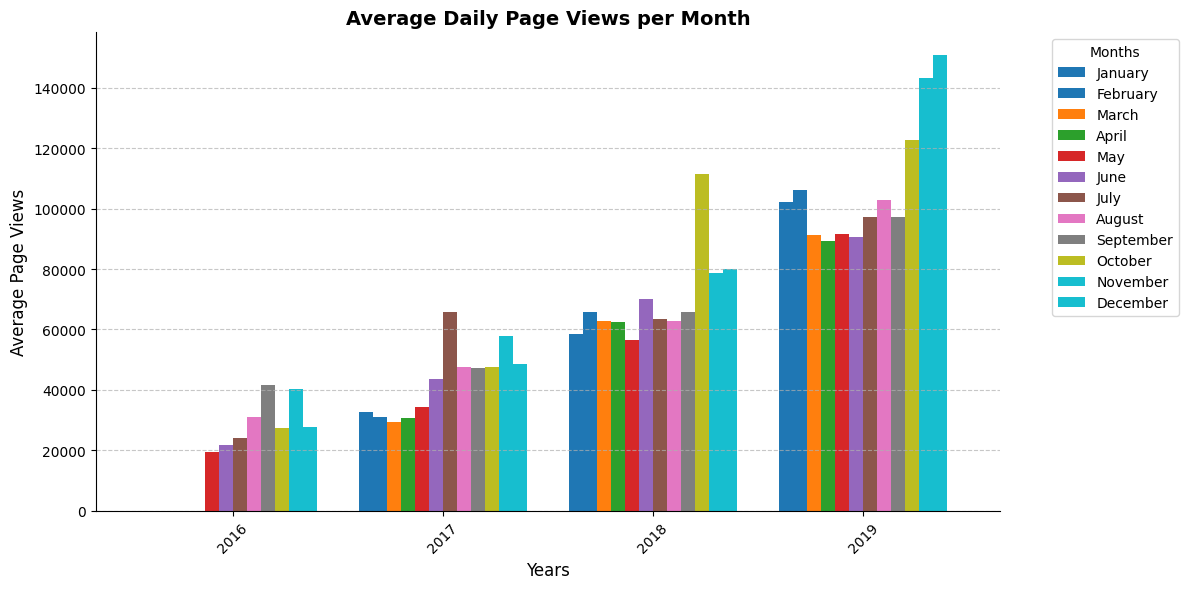

In [4]:
def draw_bar_plot():
    """Draws a grouped bar chart showing average daily page views per month grouped by year."""

    # Load dataset and parse dates
    df = pd.read_csv("fcc-forum-pageviews.csv", parse_dates=['date'])

    # Remove outliers (keeping only the middle 95% of data)
    df = df[df['value'].between(df['value'].quantile(0.025), df['value'].quantile(0.975))]

    # Extract year and month
    df['Year'] = df['date'].dt.year
    df['Month'] = df['date'].dt.month

    # Compute average daily page views per month and year
    df_grouped = df.groupby(['Year', 'Month'])['value'].mean().reset_index()

    # Create a pivot table for easier plotting
    df_pivot = df_grouped.pivot(index='Year', columns='Month', values='value')

    # Set month names as column labels
    month_labels = ["January", "February", "March", "April", "May", "June",
                    "July", "August", "September", "October", "November", "December"]
    df_pivot.columns = month_labels

    # Plot the grouped bar chart
    fig, ax = plt.subplots(figsize=(12, 6))
    df_pivot.plot(kind='bar', ax=ax, colormap='tab10', width=0.8)

    # Customize chart
    ax.set_title("Average Daily Page Views per Month", fontsize=14, fontweight='bold')
    ax.set_xlabel("Years", fontsize=12)
    ax.set_ylabel("Average Page Views", fontsize=12)
    ax.legend(title="Months", bbox_to_anchor=(1.05, 1), loc='upper left')

    # Improve layout and aesthetics
    plt.xticks(rotation=45)
    sns.despine()  # Removes top and right border for a cleaner look
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()

    # Show plot
    plt.show()

# Call the function to generate the plot
draw_bar_plot()

* Create a draw_box_plot function that uses Seaborn to draw two adjacent box plots similar to "examples/Figure_3.png". These box plots should show how the values are distributed within a given year or month and how it compares over time. The title of the first chart should be Year-wise Box Plot (Trend) and the title of the second chart should be Month-wise Box Plot (Seasonality). Make sure the month labels on bottom start at Jan and the x and y axis are labeled correctly. The boilerplate includes commands to prepare the data.

<ipython-input-7-6b40f2d835b2>:48: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='1/1/2016', periods=100, freq='M')
<ipython-input-7-6b40f2d835b2>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
<ipython-input-7-6b40f2d835b2>:28: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


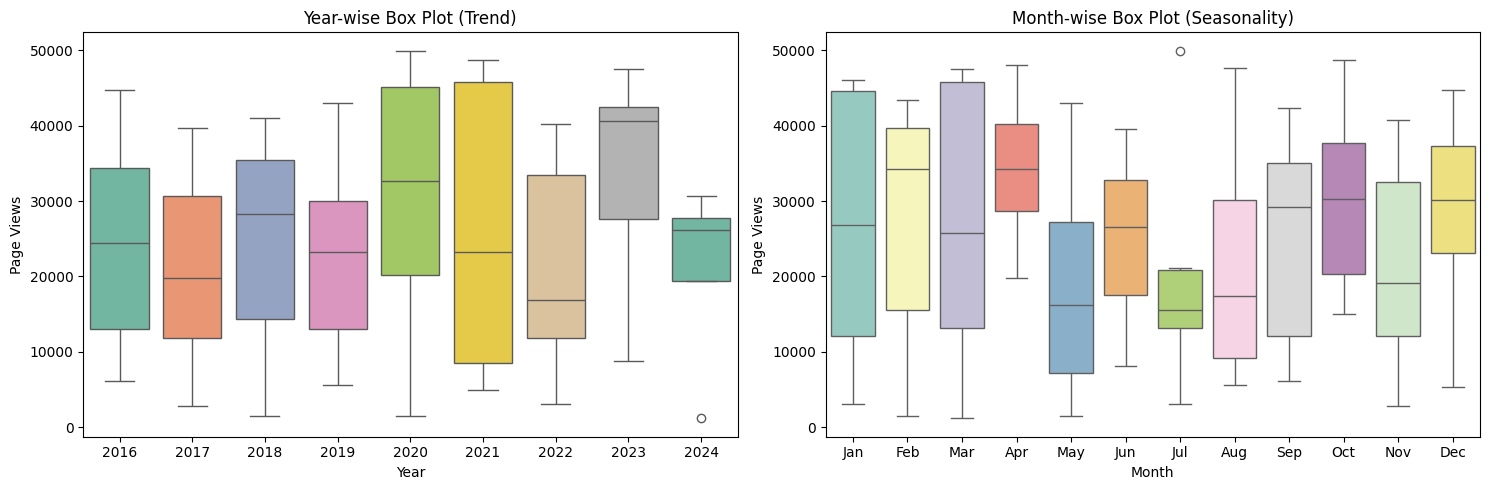

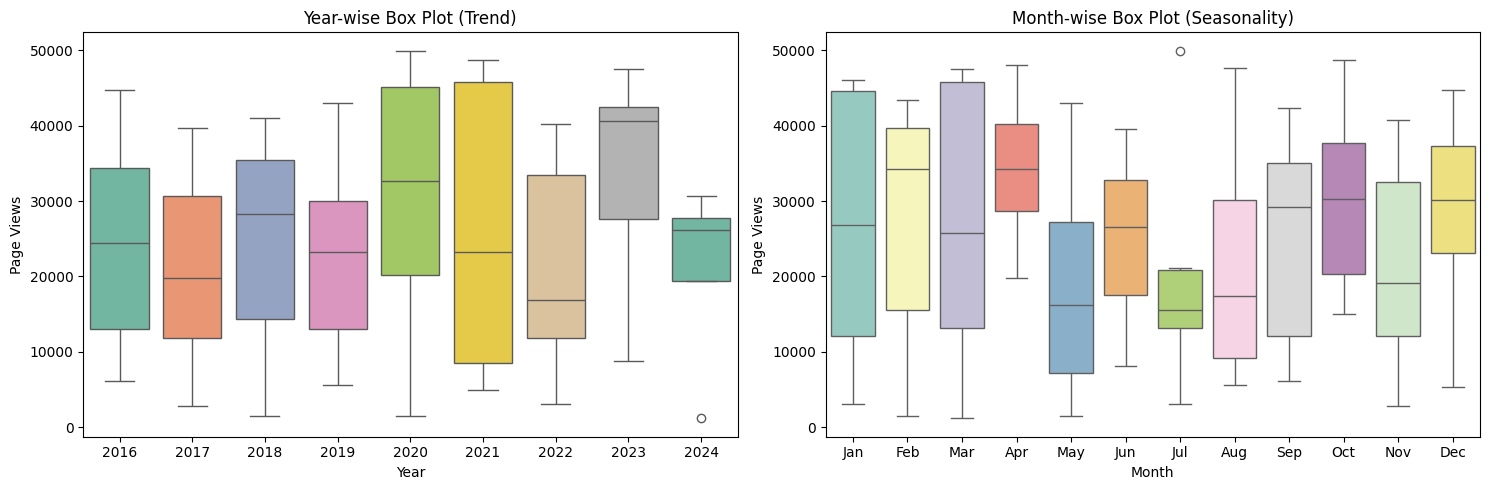

In [7]:
def draw_box_plot(df):
    # Ensure index is datetime
    df.index = pd.to_datetime(df.index)

    # Extract year and month for grouping
    df['Year'] = df.index.year
    df['Month'] = df.index.strftime('%b')  # Short month names

    # Define month order to ensure correct ordering in box plot
    month_order = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

    # Set up the figure with two subplots
    fig, axes = plt.subplots(1, 2, figsize=(15, 5))

    # Year-wise box plot
    sns.boxplot(
        ax=axes[0],
        x='Year',
        y='value',
        data=df,
        palette='Set2'
    )
    axes[0].set_title('Year-wise Box Plot (Trend)')
    axes[0].set_xlabel('Year')
    axes[0].set_ylabel('Page Views')

    # Month-wise box plot
    sns.boxplot(
        ax=axes[1],
        x='Month',
        y='value',
        data=df,
        order=month_order,
        palette='Set3'
    )
    axes[1].set_title('Month-wise Box Plot (Seasonality)')
    axes[1].set_xlabel('Month')
    axes[1].set_ylabel('Page Views')

    # Adjust layout for better spacing
    plt.tight_layout()

    # Show plot
    plt.show()
    return fig

# Example function call with a sample DataFrame
dates = pd.date_range(start='1/1/2016', periods=100, freq='M')
values = np.abs(np.random.randint(1000, 50000, size=100))
df = pd.DataFrame({'value': values}, index=dates)

# Call the function
draw_box_plot(df)
